## 5-fold cross validation

## 二項ロジスティック回帰

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import mord
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import KFold
from scipy.stats import t

In [4]:
from sklearn.linear_model import LogisticRegression

## データの読み込み

In [5]:
df_1v2_reason95_orderlog0_livedum_all = pd.read_csv('df_1v2_reason95_orderlog0_livedum_all.csv')

C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_21244\1688623676.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1v2_reason95_orderlog0_livedum_all = pd.read_csv('df_1v2_reason95_orderlog0_livedum_all.csv')


In [6]:
df_1v2_reason95_orderlog0_livedum_all_land = pd.read_csv('df_1v2_reason95_orderlog0_livedum_all_land.csv')

In [7]:
df_1v2_reason95_orderlog0_livedum_all_build = pd.read_csv('df_1v2_reason95_orderlog0_livedum_all_build.csv')

In [8]:
df_1v2_reason95_orderlog0_livedum_all_subuild =  pd.read_csv('df_1v2_reason95_orderlog0_livedum_all_subuild.csv')

## 全データ

In [14]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all['sales1_period'] <= 30, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all[[
    'population_density', 'month_sin', 'month_cos', 'size',   
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
    'dummy_土地', 'dummy_建物', 'dummy_区分建物'
]]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Mean AUC: 0.8523
AUC Standard Deviation: 0.0013


In [15]:
coefficients

[array([ 0.08555463, -0.07710244, -0.11016997, -0.06008795, -0.02569077,
         1.34875233,  1.02341468,  0.35743706,  1.87999976, -2.21683551,
         2.62989683,  3.14040632,  3.09042344,  0.25705072,  0.52070783,
        -1.99945024, -0.32113579,  1.36509195,  3.1282899 ,  1.79572139,
         4.28501522, -0.57033821, -0.56000843, -0.40712661]),
 array([ 0.09172879, -0.07581498, -0.11847605, -0.05925722, -0.07835226,
         1.30848464,  0.99602112,  0.35519611,  1.85069318, -2.36047979,
         2.6193744 ,  3.11667233,  3.05195155,  0.27315023,  0.5024423 ,
        -2.13339341, -0.35957897,  1.32702839,  3.12164043,  1.77797122,
         4.27467314, -0.55416445, -0.56092491, -0.39652992]),
 array([ 0.10231424, -0.08288032, -0.11677955, -0.06430338, -0.06059464,
         1.32043607,  1.01022843,  0.31425261,  1.86249748, -2.4086103 ,
         2.61352861,  3.12666186,  3.07106806,  0.2728394 ,  0.50452799,
        -2.0245654 , -0.32243167,  1.34312657,  3.11003637,  1.78297723,


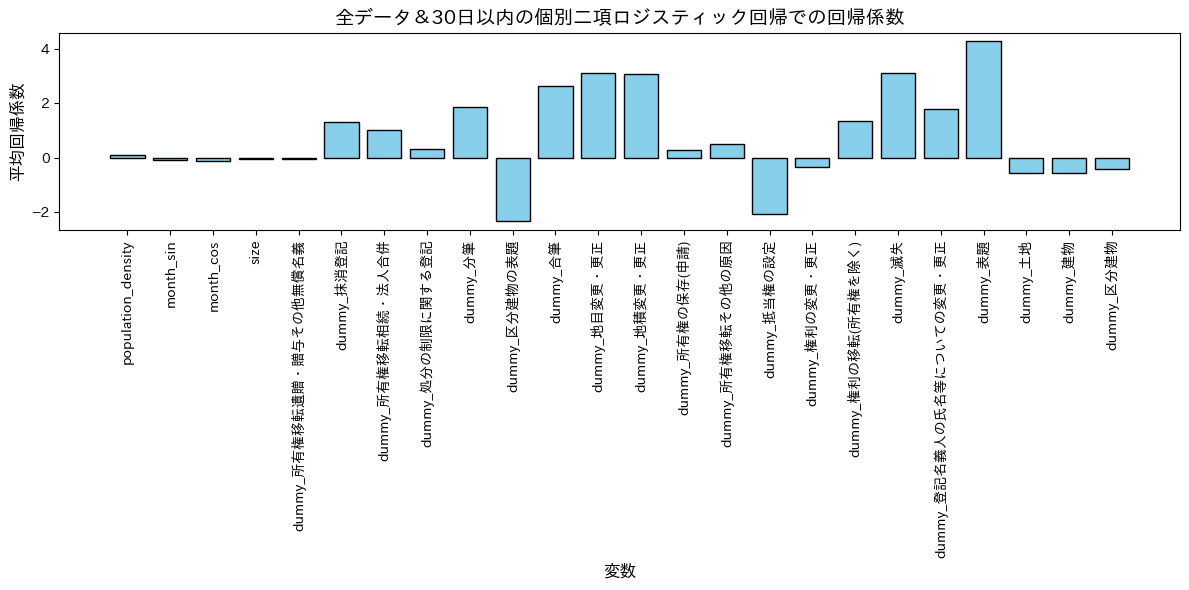

In [43]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('全データ＆30日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

In [44]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all['sales1_period'] <= 60, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all[[
    'population_density', 'month_sin', 'month_cos', 'size',   
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
    'dummy_土地', 'dummy_建物', 'dummy_区分建物'
]]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

Mean AUC: 0.813
AUC Standard Deviation: 0.001


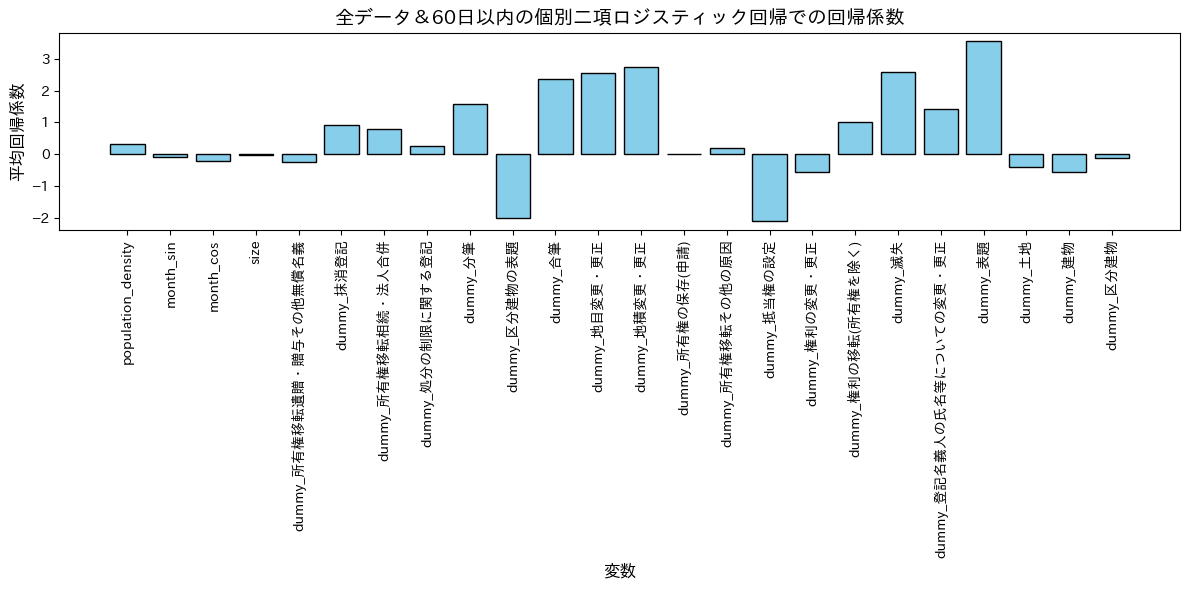

In [45]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('全データ＆60日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

In [46]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all['sales1_period'] <= 90, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all[[
    'population_density', 'month_sin', 'month_cos', 'size',   
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
    'dummy_土地', 'dummy_建物', 'dummy_区分建物'
]]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

Mean AUC: 0.792
AUC Standard Deviation: 0.001


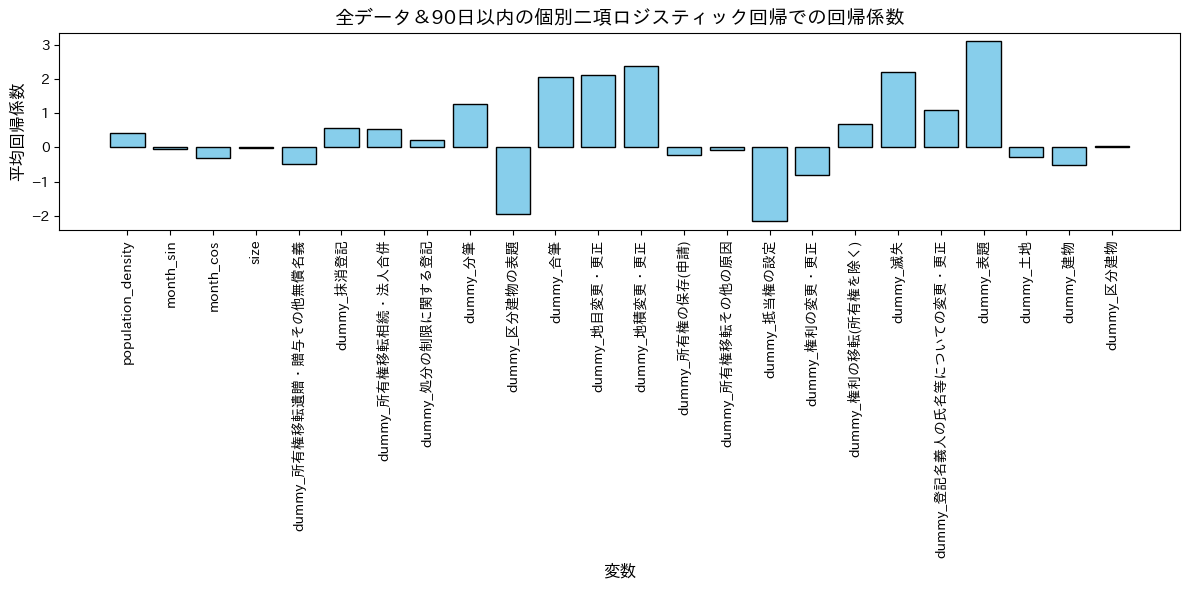

In [47]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('全データ＆90日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

In [48]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all['sales1_period'] <= 180, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all[[
    'population_density', 'month_sin', 'month_cos', 'size',   
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
    'dummy_土地', 'dummy_建物', 'dummy_区分建物'
]]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

Mean AUC: 0.764
AUC Standard Deviation: 0.001


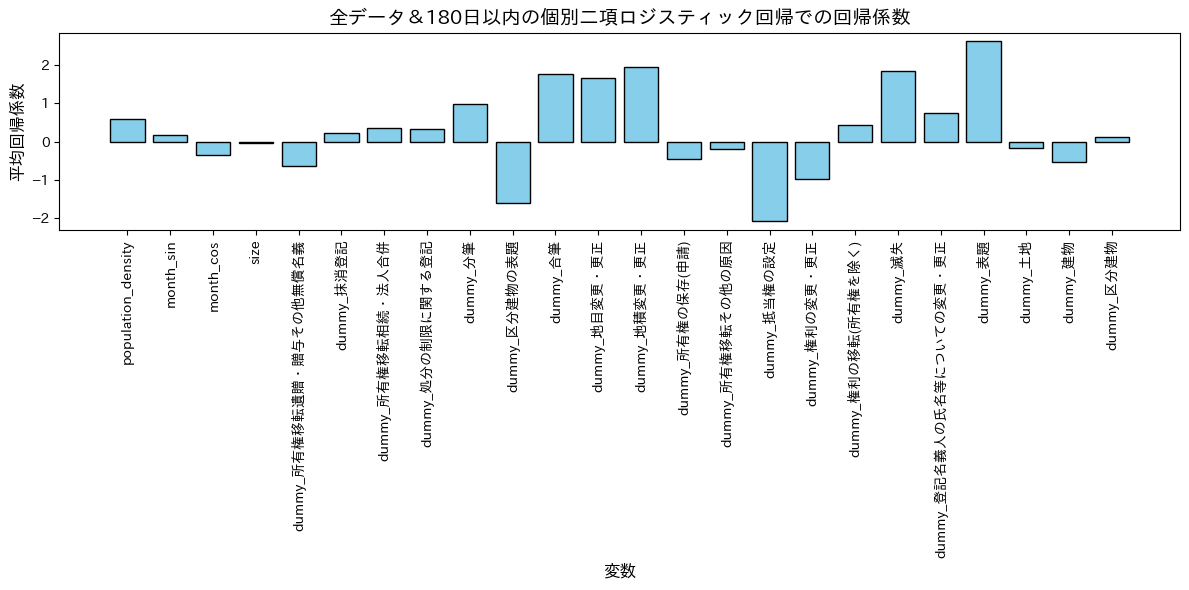

In [49]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('全データ＆180日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

In [50]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all['sales1_period'] <= 360, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all[[
    'population_density', 'month_sin', 'month_cos', 'size',   
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
    'dummy_土地', 'dummy_建物', 'dummy_区分建物'
]]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

Mean AUC: 0.749
AUC Standard Deviation: 0.001


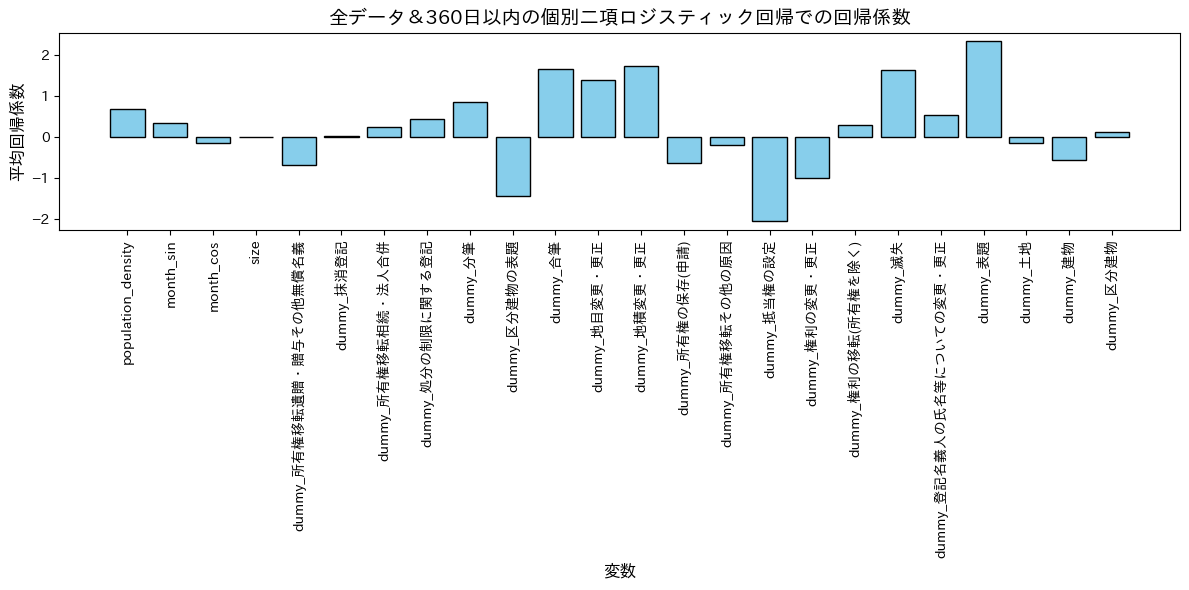

In [51]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('全データ＆360日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

## 土地

In [9]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 30, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all_land['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all_land[[
    'population_density', 'month_sin', 'month_cos', 'size',
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題'
]]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean AUC: 0.742
AUC Standard Deviation: 0.003


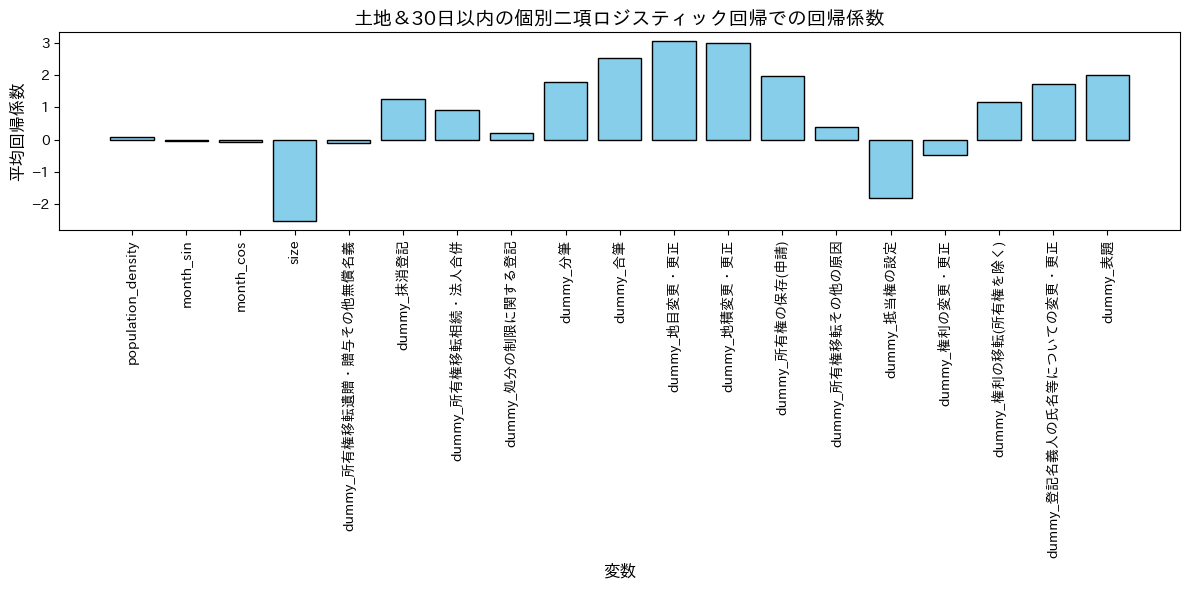

In [10]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('土地＆30日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

In [12]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 60, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all_land['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all_land[[
    'population_density', 'month_sin', 'month_cos', 'size',
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題'
]]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

Mean AUC: 0.726
AUC Standard Deviation: 0.001


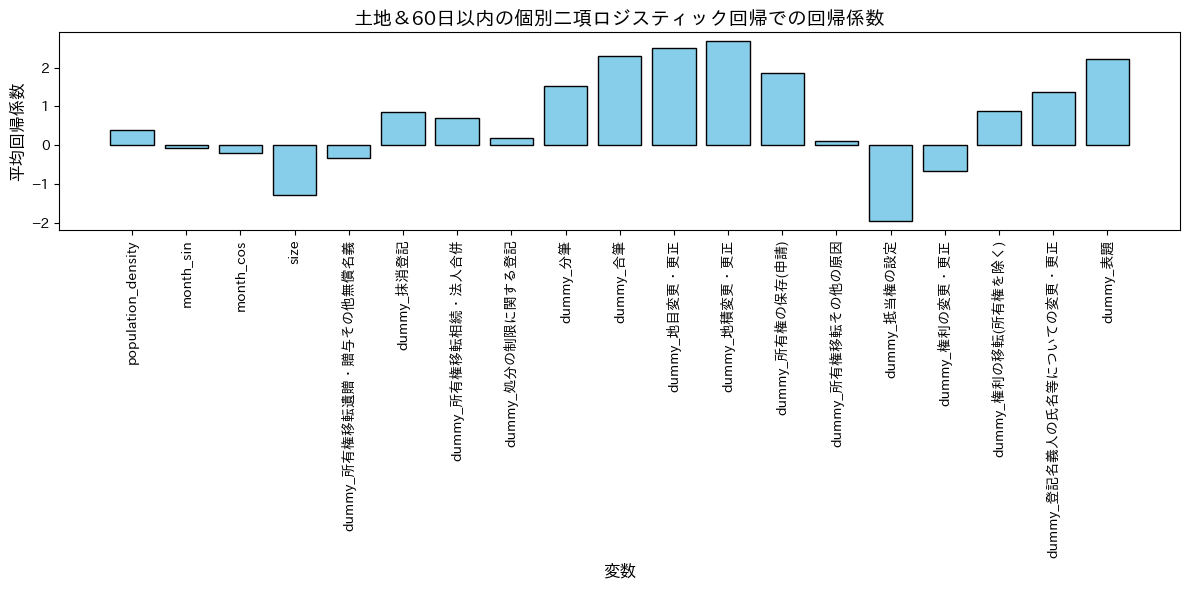

In [13]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('土地＆60日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

In [14]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 90, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all_land['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all_land[[
    'population_density', 'month_sin', 'month_cos', 'size',
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題'
]]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

Mean AUC: 0.716
AUC Standard Deviation: 0.001


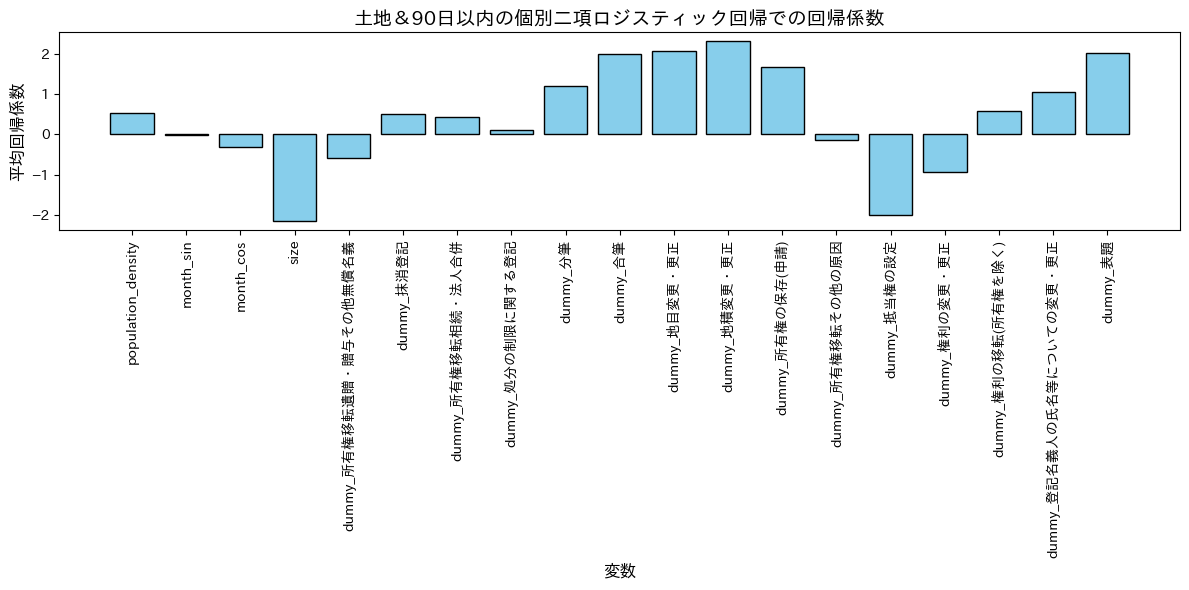

In [15]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('土地＆90日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

In [16]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 180, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all_land['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all_land[[
    'population_density', 'month_sin', 'month_cos', 'size',
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題'
]]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

Mean AUC: 0.704
AUC Standard Deviation: 0.001


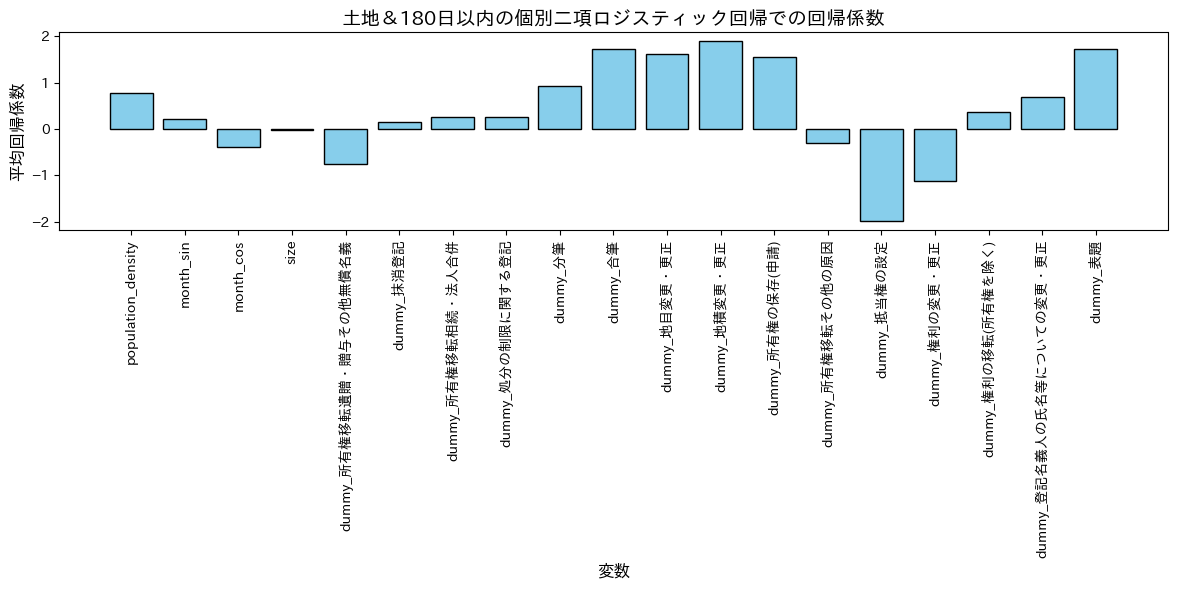

In [17]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('土地＆180日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

In [18]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 360, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all_land['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all_land[[
    'population_density', 'month_sin', 'month_cos', 'size',
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題'
]]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

Mean AUC: 0.696
AUC Standard Deviation: 0.001


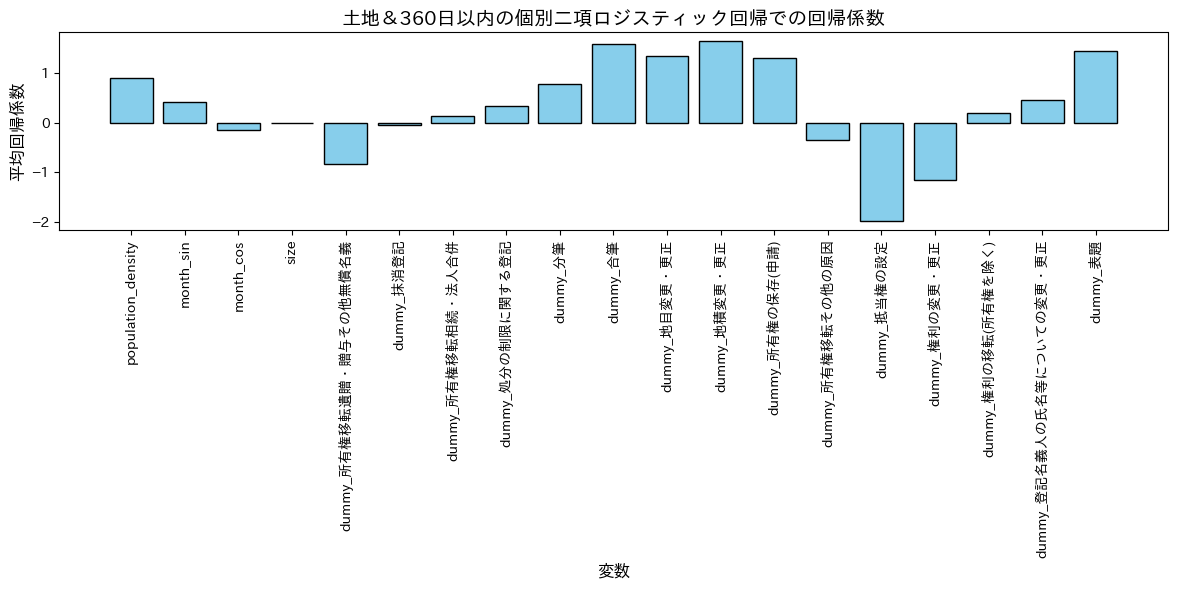

In [19]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('土地＆360日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

## 建物

In [9]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 30, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all_build['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all_build[[
    'population_density', 'month_sin', 'month_cos', 'size',
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Mean AUC: 0.8338
AUC Standard Deviation: 0.0012


C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


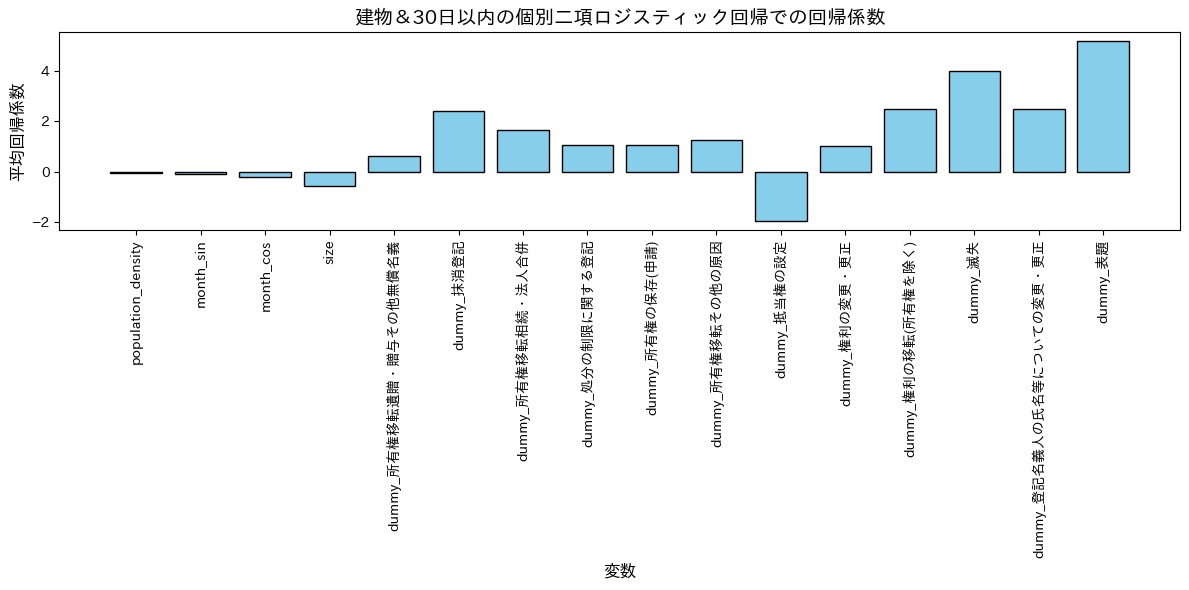

In [22]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('建物＆30日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

In [10]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 60, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all_build['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all_build[[
    'population_density', 'month_sin', 'month_cos', 'size',
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Mean AUC: 0.8205
AUC Standard Deviation: 0.0014


C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


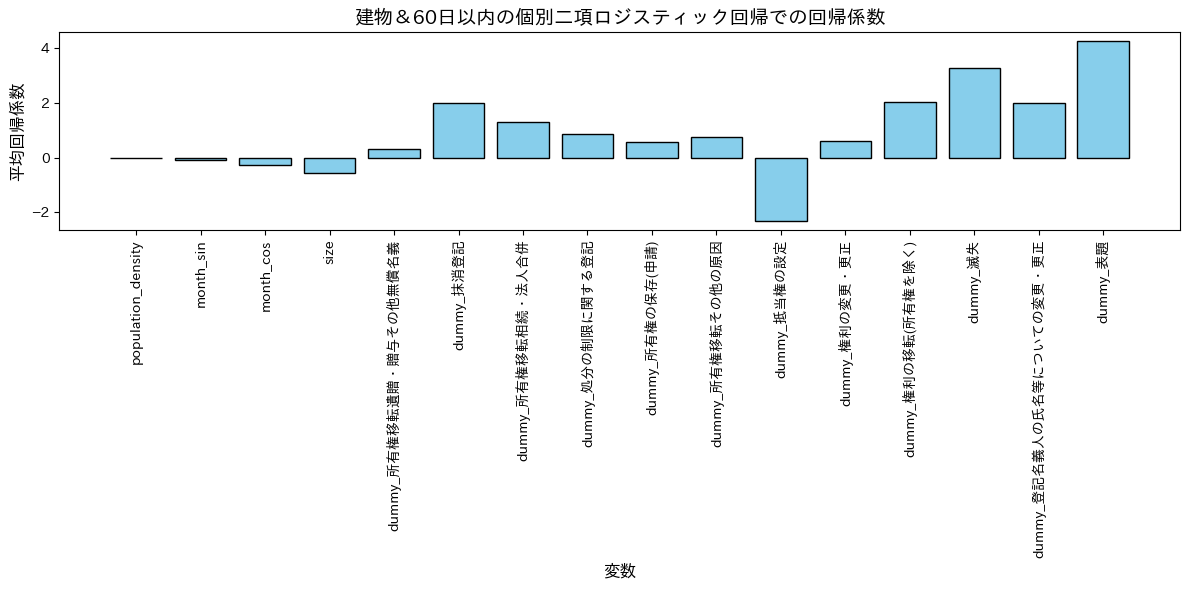

In [24]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('建物＆60日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

In [11]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 90, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all_build['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all_build[[
    'population_density', 'month_sin', 'month_cos', 'size',
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean AUC: 0.8127
AUC Standard Deviation: 0.0017


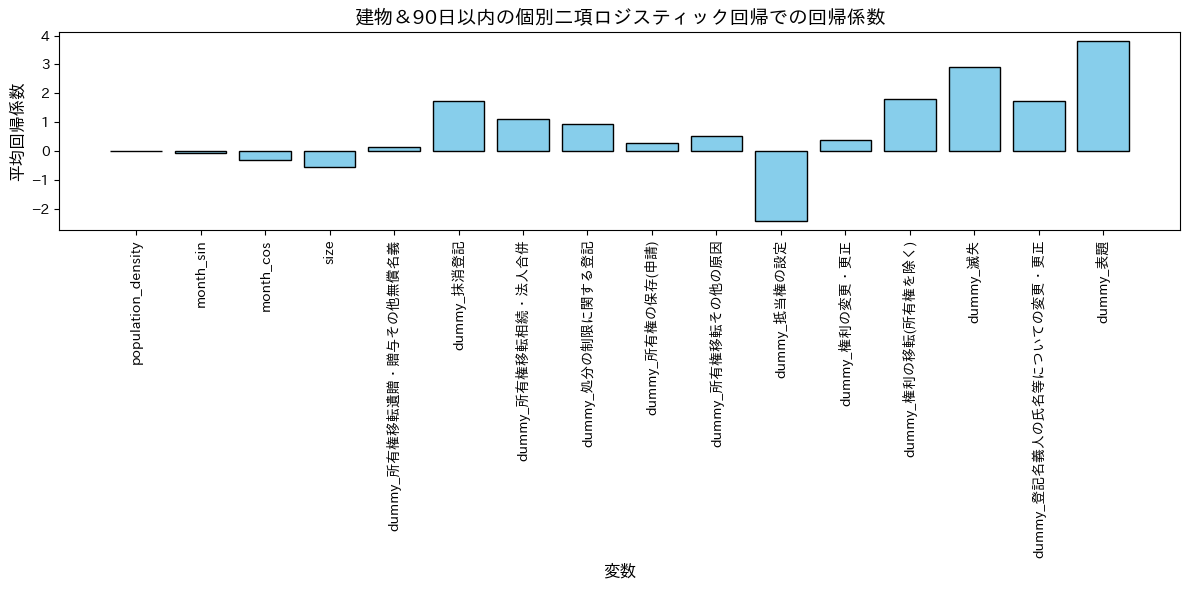

In [26]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('建物＆90日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

In [12]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 180, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all_build['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all_build[[
    'population_density', 'month_sin', 'month_cos', 'size',
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

Mean AUC: 0.8006
AUC Standard Deviation: 0.0019


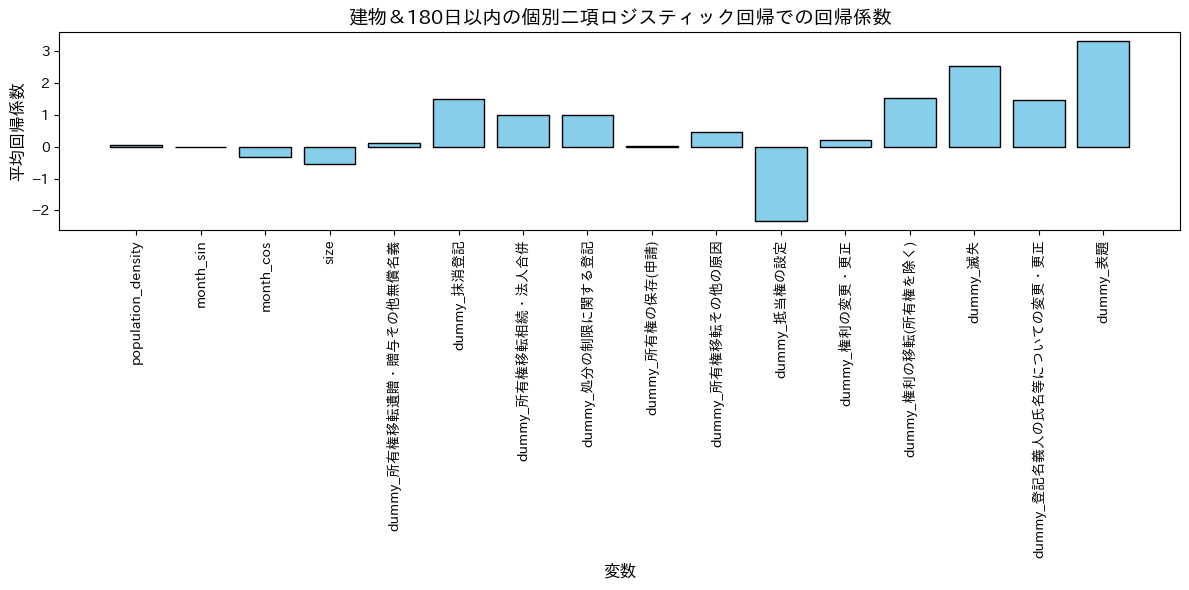

In [28]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('建物＆180日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

In [13]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 360, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all_build['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all_build[[
    'population_density', 'month_sin', 'month_cos', 'size',
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

Mean AUC: 0.7929
AUC Standard Deviation: 0.0018


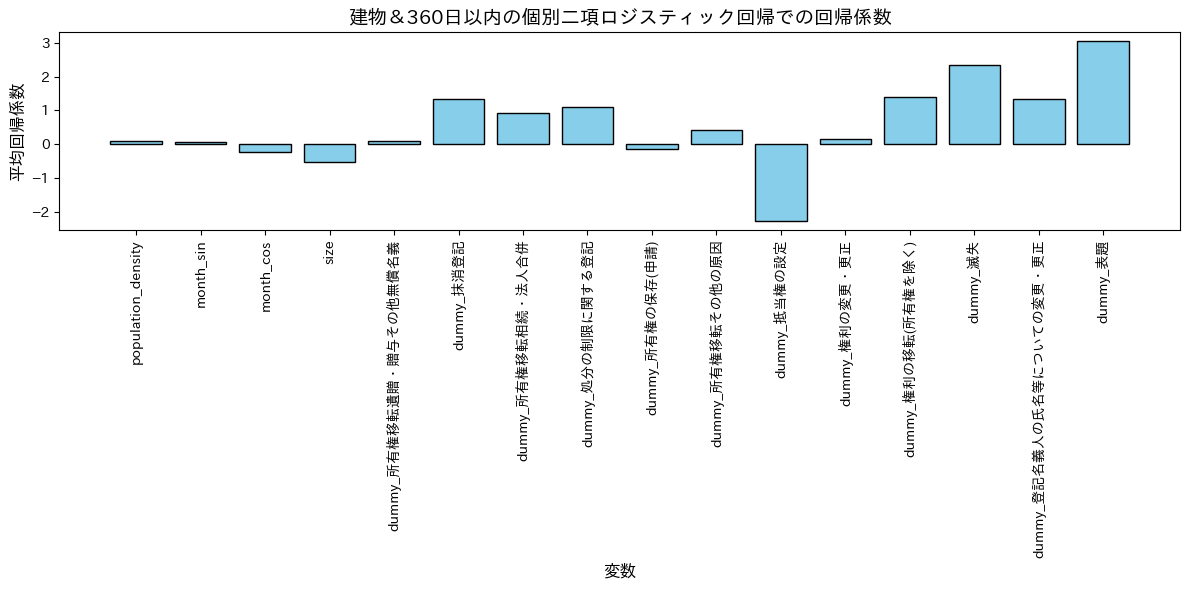

In [30]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('建物＆360日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

## 区分建物

In [32]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 30, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all_subuild[[
    'population_density', 'month_sin', 'month_cos', 'size',   
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題'
]]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

Mean AUC: 0.773
AUC Standard Deviation: 0.006


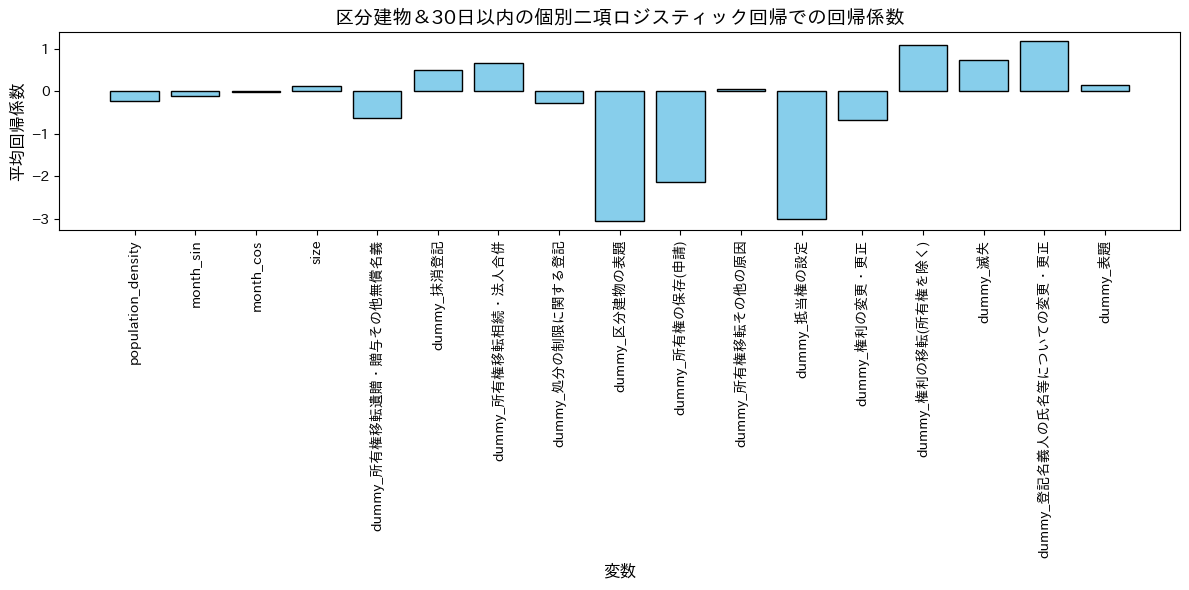

In [33]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('区分建物＆30日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

In [34]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 60, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all_subuild[[
    'population_density', 'month_sin', 'month_cos', 'size',   
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題'
]]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

Mean AUC: 0.762
AUC Standard Deviation: 0.004


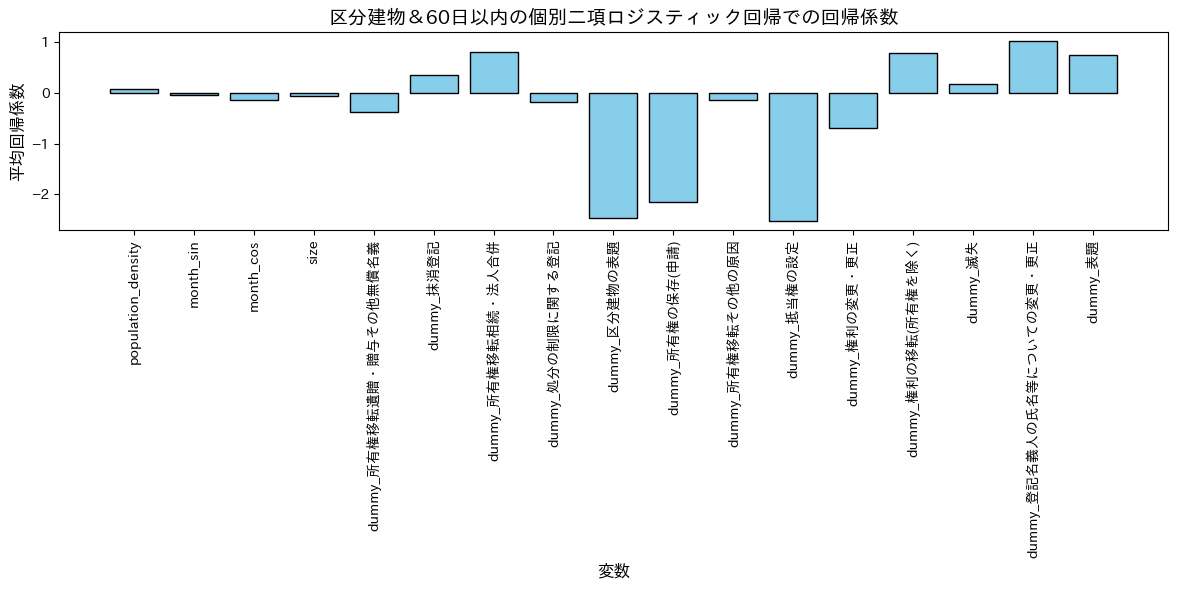

In [35]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('区分建物＆60日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

In [36]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 90, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all_subuild[[
    'population_density', 'month_sin', 'month_cos', 'size',   
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題'
]]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

Mean AUC: 0.758
AUC Standard Deviation: 0.004


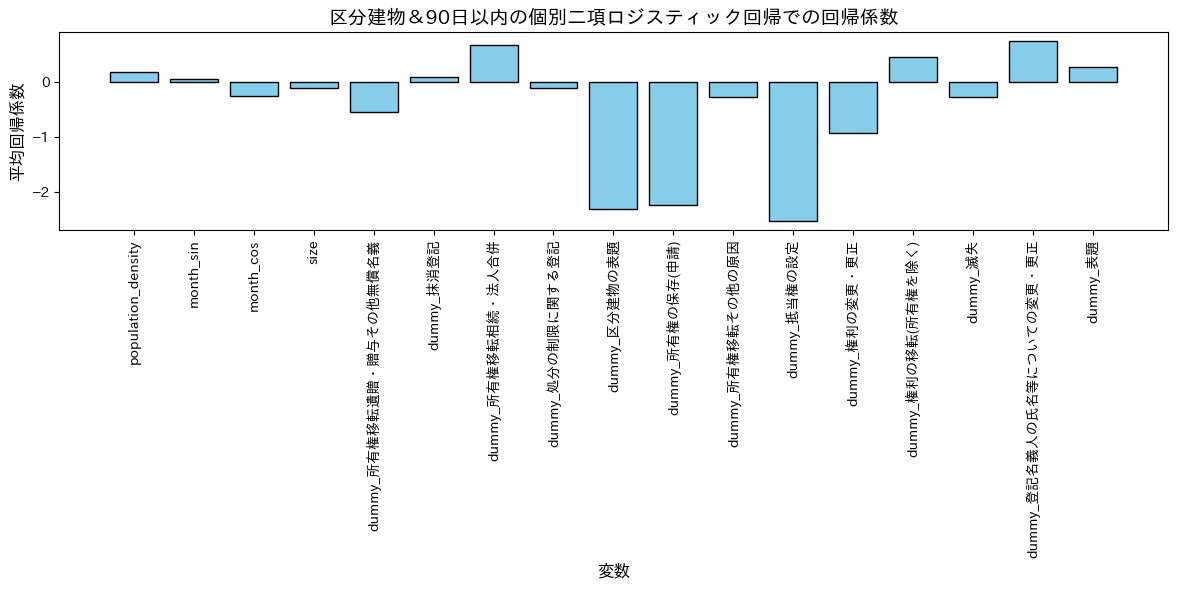

In [37]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('区分建物＆90日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

In [38]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 180, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all_subuild[[
    'population_density', 'month_sin', 'month_cos', 'size',   
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題'
]]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

Mean AUC: 0.750
AUC Standard Deviation: 0.004


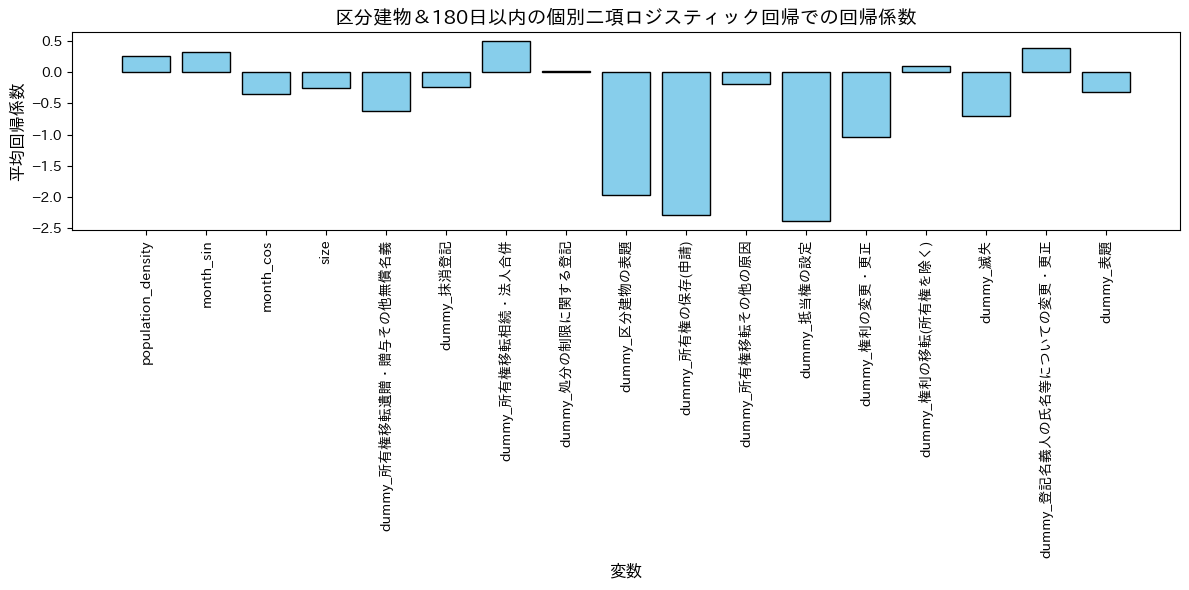

In [39]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('区分建物＆180日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

In [40]:
# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 360, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all_subuild[[
    'population_density', 'month_sin', 'month_cos', 'size',   
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題'
]]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.4f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.4f}")

Mean AUC: 0.742
AUC Standard Deviation: 0.004


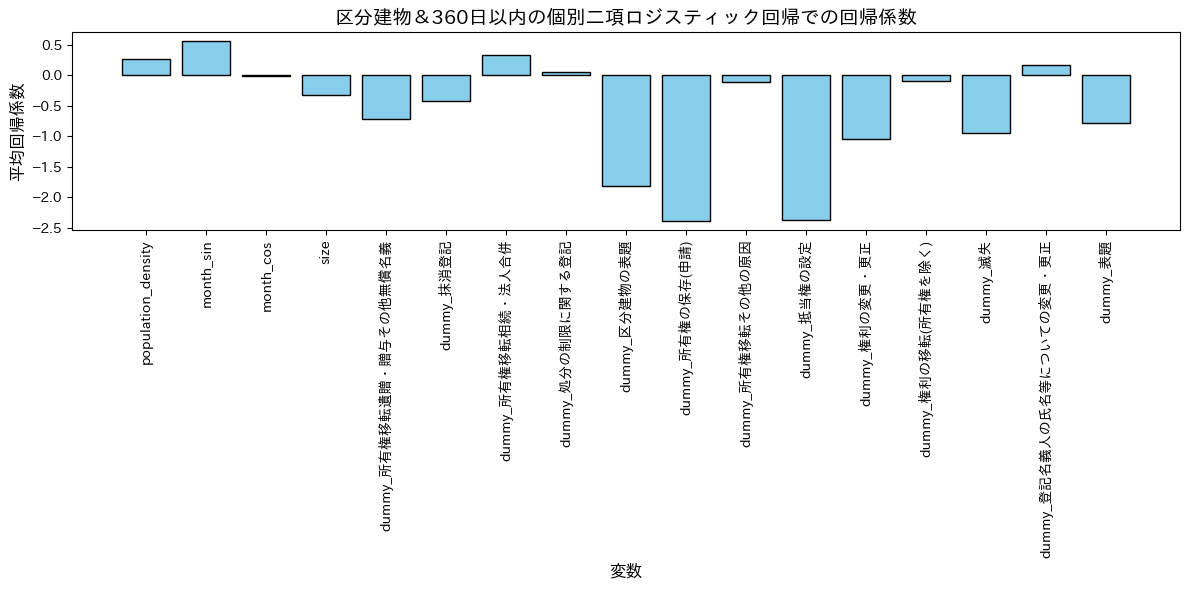

In [41]:
# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('区分建物＆360日以内の個別二項ロジスティック回帰での回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()